In [ ]:
!pip install ewl

In [2]:
from ewl import *

In [3]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2  # initial state
psi

sqrt(2)*(|00> + I*|11>)/2

In [4]:
alice = U(theta=pi / 2, alpha=pi / 2, beta=0)  # quantum strategy
alice

Matrix([
[sqrt(2)*I/2,  sqrt(2)*I/2],
[sqrt(2)*I/2, -sqrt(2)*I/2]])

In [5]:
bob = U(theta=0, alpha=0, beta=0)  # classical strategy (C)
bob

Matrix([
[1, 0],
[0, 1]])

In [6]:
ewl = EWL(psi, [alice, bob])
ewl

In [7]:
ewl.J

Matrix([
[  sqrt(2)/2,           0,           0, -sqrt(2)*I/2],
[          0, sqrt(2)*I/2,  -sqrt(2)/2,            0],
[          0,  -sqrt(2)/2, sqrt(2)*I/2,            0],
[sqrt(2)*I/2,           0,           0,   -sqrt(2)/2]])

In [8]:
ewl.J_H

Matrix([
[  sqrt(2)/2,            0,            0, -sqrt(2)*I/2],
[          0, -sqrt(2)*I/2,   -sqrt(2)/2,            0],
[          0,   -sqrt(2)/2, -sqrt(2)*I/2,            0],
[sqrt(2)*I/2,            0,            0,   -sqrt(2)/2]])

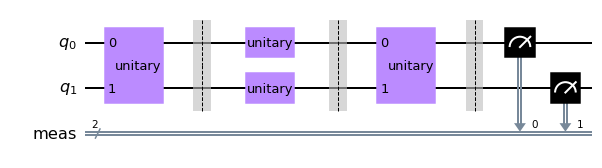

In [9]:
ewl.draw()

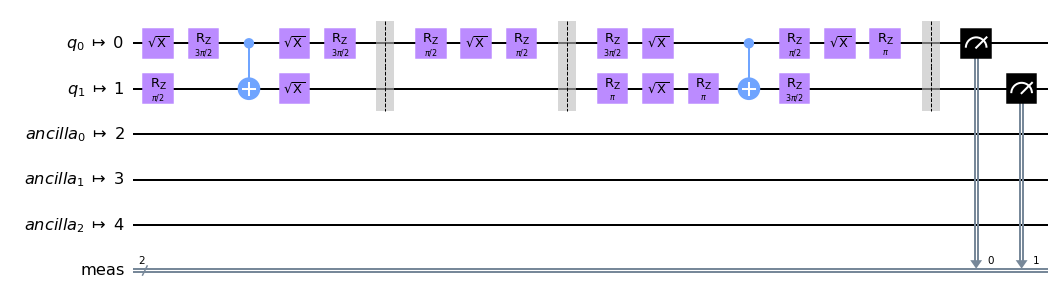

In [10]:
ewl.draw_transpiled(backend_name='ibmq_athens', optimization_level=3)

In [11]:
ewl.calculate_probs()

Matrix([
[  0],
[  0],
[1/2],
[1/2]])

{'01': 0.5, '11': 0.5}


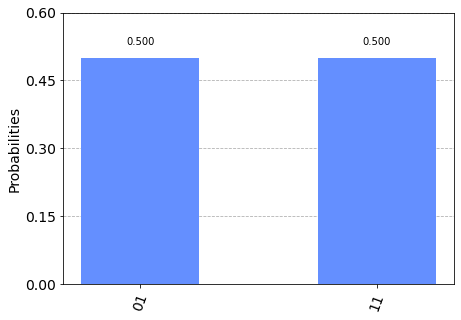

In [12]:
probs = ewl.simulate_probs()
print(probs)
plot_histogram(probs)

{'01': 532, '11': 492}


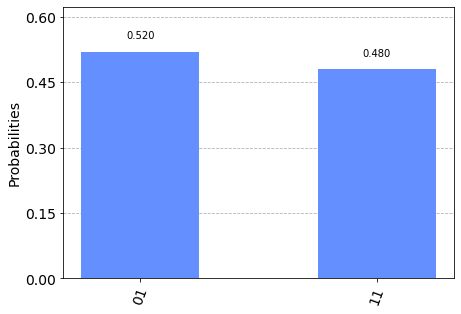

In [13]:
counts_qasm_simulator = ewl.simulate_counts()
print(counts_qasm_simulator)
plot_histogram(counts_qasm_simulator)

Job Status: job has successfully run
{'00': 46, '01': 489, '10': 42, '11': 447}


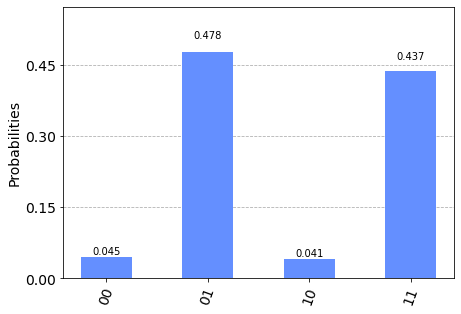

In [14]:
counts_quantum_device = ewl.run()
print(counts_quantum_device)
plot_histogram(counts_quantum_device)

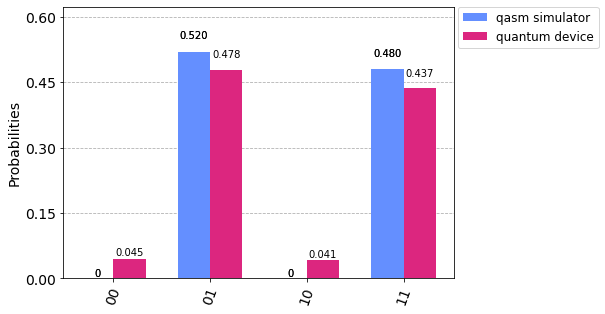

In [15]:
plot_histogram(data=[counts_qasm_simulator, counts_quantum_device], legend=['qasm simulator', 'quantum device'])